# **Projet LEYENDA**
## **Livrable 3, Solution Finale**
##### **Groupe** : Adrien Syrotnik, Justine Quatresols, Sofian Terrab, Adrien Nicolas

# Sommaire :

* [1. Introduction - Suite de la partie captioning](#intro)
* [2. Création de la pipeline](#creation)
    * [2.1. Importation des librairies](#importation)
    * [2.2. Modèle de classification](#classification)
    * [2.3. Modèle de débruitage](#debruitage)
    * [2.4. Modèle de légende automatique](#legende)
    * [2.5. Chargement des images](#chargement)
    * [2.6. Création de la pipeline](#pipeline)
* [3. Création d'une interface graphique](#interface)
* [4. Conclusion](#conclusion)

# **1. Introduction - Suite de la partie captionning** <a class="anchor" id="intro"></a>

L'entreprise TouNum, experte en numérisation, vise l'innovation à travers l'intégration d'outils de Machine Learning. L'ambition est d'optimiser la catégorisation de leur vaste base de données d'images. Ayant déjà progressé sur le volet de captioning, nous sommes désormais en phase de finalisation de notre solution. Celle-ci a pour but de trier efficacement les images et d'attribuer automatiquement une légende descriptive.

Le schéma ci-dessous décrit le fonctionnement détaillé de notre solution finale :

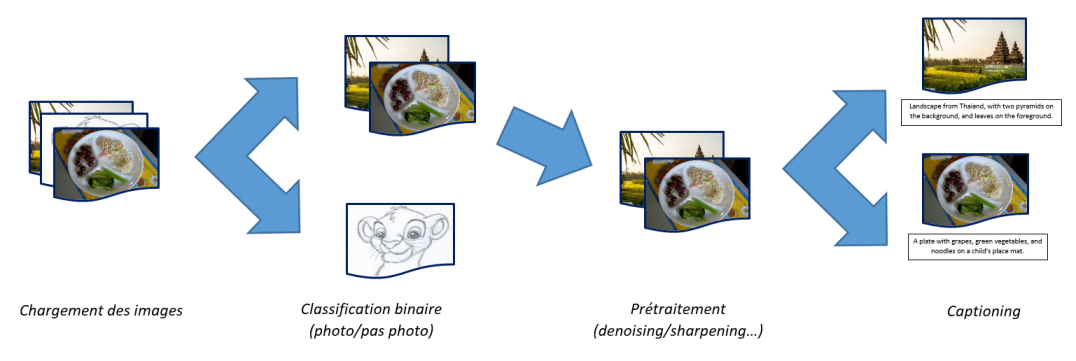

Ce document s'appuie sur les précédents travaux pour concrétiser notre solution ultime. Ainsi, nous intégrons les modèles de classification du premier livrable, le modèle de débruitage du deuxième livrable et le système de légende automatique du troisième livrable.

# **2. Création de la pipeline** <a class="anchor" id="creation"></a>

## **2.1. Importation des librairies** <a class="anchor" id="importation"></a>

Avant de commencer, nous allons importer les librairies nécessaires à la réalisation de notre solution finale.

In [1]:
##################### IMPORT LIBRARIES #####################
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file
import tensorflow as tf

2023-10-26 13:37:48.896833: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 13:37:48.896915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 13:37:48.900464: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 13:37:49.254153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## **2.2. Modèle de classification** <a class="anchor" id="classification"></a>

Nous commençons la première étape de notre solution finale avec la mise en œuvre du modèle de classification. Pour cela, on va utiliser le modèle de classification du livrable 1. On rappelle que ce modèle est un modèle de classification binaire qui permet de déterminer si une image est une photo ou non. Ce modèle est basé sur ResNet50.

On va donc créer une fonction qui prendra une image en entrée et qui retournera la prédiction du modèle de classification. Si le résultat est positif (True), cela signifie que l'image est une photo ; sinon (False), ce ne l'est pas.

In [2]:
##################### IsPhoto #####################
resnetfolder = '../usr/src/project/_Dataset/resnet/' # Local
model_resnet = load_model(resnetfolder + 'model-ResNetType.RESNET50-TrainSet.BINARY-True-imagenet-avg-adam-binary_crossentropy-True-True-False.h5')
class_names = ['Non Photo','Photo']
image_size_resnet = 224

def isPhoto(img,show=False):
    #resize the img for resnet
    img = img.resize((image_size_resnet, image_size_resnet))

    input_arr = image.img_to_array(img)
    input_arr = np.array([input_arr])  # Convert single image to a batch.

    # Predict the class
    predictions = model_resnet.predict(input_arr, verbose=0)

    predictions = np.round(predictions)

    # Show the image
    if show:
        plt.imshow(img)
        plt.axis("off")
        plt.show()

    if int(predictions[0]) == 1:
        return True
    else:
        return False

2023-10-26 13:37:58.801044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-26 13:37:58.864246: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-26 13:37:58.864320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-26 13:37:58.869637: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-26 13:37:58.869725: I tensorflow/compile

## **2.3. Modèle de débruitage** <a class="anchor" id="debruitage"></a>

Dans cette seconde étape de notre solution finale, nous allons utiliser le modèle de débruitage du livrable 2. On rappelle que ce modèle est un modèle de débruitage d'images basé sur un auto-encodeur. On va donc créer une fonction qui prendra une image en entrée et qui retournera l'image débruitée.

In [3]:
##################### Denoise #####################
path_best_autoencoder = '../usr/src/project/_Dataset/best_models/best_autoencoder.h5'
# path_best_autoencoder = '../usr/src/project/_Dataset/best_models/best_autoencoder_2Pool.h5'
autoencoder = load_model(path_best_autoencoder)
image_size_autoencoder = 500

def denoise(img):
    # Prétraiter l'image pour la rendre compatible avec l'autoencodeur
    input_arr = image.img_to_array(img)
    input_arr = np.array([input_arr]) / 255.0

    # Effectuer la prédiction
    decoded_img = autoencoder.predict(input_arr, verbose=0)

    return decoded_img[0]

## **2.4. Modèle de légende automatique** <a class="anchor" id="legende"></a>

Pour cette dernière étape de notre solution complète, on va intégrer le modèle de légende automatique du livrable 3. Étant plus complexe que les deux autres modèles, il va falloir réimplémenter l'ensemble du modèle puis charger le tokenizer et les paramètres du modèle. 

En finalité, on va créer une fonction qui prendra une image en entrée et qui retournera la légende automatique de l'image.

In [4]:
##################### Captionning #####################
#load glove, embedding_dim, units, vocab_size, embedding_matrix, attention_features_shape, max_length
import json
with open('../usr/src/project/_Dataset/WS6/save_captionning/params.json') as f:
    params = json.load(f)

embedding_dim = params['embedding_dim']
units = params['units']
vocab_size = params['vocab_size']
embedding_matrix = np.array(params['embedding_matrix'])
max_length = params['max_length']
attention_features_shape = params['attention_features_shape']

#load image_features_extract_model
image_features_extract_model = tf.keras.models.load_model('../usr/src/project/_Dataset/WS6/save_captionning/image_features_extract_model.h5')

#load tokenizer
import pickle
with open('../usr/src/project/_Dataset/WS6/save_captionning/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

num_words = len(tokenizer.word_index) + 1

class CNN_Encoder(tf.keras.Model):
    # Comme les images sont déjà prétraités par InceptionV3 est représenté sous forme compacte
    # L'encodeur CNN ne fera que transmettre ces caractéristiques à une couche dense
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # forme après fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                             self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer)

        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights
    
# Couche Embedding
embeddingGlove = tf.keras.layers.Embedding(
    num_words, embedding_dim,
    embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
    trainable=False # cette couche embedding est fixée, il ne faut pas
                    # qu'elle soit rentrée dans la couche d'entrainement
)

class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units
        self.embedding = embeddingGlove
        #Replace GRU by LSTM
        self.lstm = tf.keras.layers.LSTM(self.units,
                                        return_sequences=True,
                                        return_state=True,
                                        recurrent_initializer='glorot_uniform')
        #Couche dense qui aura pour entrée la sortie du GRU
        self.fc1 = tf.keras.layers.Dense(self.units)
        # Dernière couche dense
        self.fc2 = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        # L'attention est defini par un modèle a part
        context_vector, attention_weights = self.attention(features, hidden)
        # Passage du mot courant à la couche embedding
        x = self.embedding(x)
        # Concaténation
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        #Replace GRU by LSTM
        output, state, _ = self.lstm(x)
        # Couche dense
        y = self.fc1(output)
        y = tf.reshape(y, (-1, x.shape[2]))
        # Couche dense
        y = self.fc2(y)
        return y, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))
    
# Définition de la fonction load_image
def load_image(image):
    """
    La fonction load_image a pour entrée le chemin d'une image et pour sortie un couple
    contenant l'image traitée ainsi que son chemin d'accès.
    La fonction load_image effectue les traitement suivant:
        1. Chargement du fichier correspondant au chemin d'accès image_path
        2. Décodage de l'image en RGB.
        3. Redimensionnement de l'image en taille (299, 299).
        4. Normalisation des pîxels de l'image entre -1 et 1
    """
    # img =  tf.io.read_file(image_path)
    # img =  tf.image.decode_jpeg(img, channels=3)
    img =  tf.image.resize(image, (299, 299))
    img =  tf.keras.applications.inception_v3.preprocess_input(img)
    return img
    
    
# Création de l'encodeur
encoder = CNN_Encoder(embedding_dim)
# Création du décodeur
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

# Optimiseur ADAM
optimizer = tf.keras.optimizers.Adam()
# La fonction de perte
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

checkpoint_path = "../usr/src/project/_Dataset/WS6/checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    # Restaurer le dernier checkpoint dans checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint)

def captionning(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image), 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    # return result, attention_plot
    return result

## **2.5. Chargement des images** <a class="anchor" id="chargement"></a>

Avant de préparer notre pipeline finale, nous allons élaborer une fonction qui permettra de charger les images à partir d'un chemin donné ou à partir d'une URL. Cette fonction retournera l'image chargée de la taille souhaitée par l'auto-encodeur.

In [5]:
##################### Get image from dir or url #####################
def get_image_from_path_or_url(image_file):
    # Load an image in tensor format
    img = None
    # test if image_path is url
    if image_file.startswith('http'):
        img = image.load_img(get_file(origin=image_file), target_size=(image_size_autoencoder, image_size_autoencoder))
    else:
        img = image.load_img(image_file, target_size=(image_size_autoencoder, image_size_autoencoder))
    return img

## **2.6. Création de la pipeline** <a class="anchor" id="pipeline"></a>

Après avoir élaboré toutes les fonctions nécessaires à notre solution, il est temps de mettre en place la pipeline finale. On rappelle le fonctionnement :

- Chargement d'une ou plusieurs images depuis le disque ou via une URL.
- Déterminer si l'image est une photo ou non
    - Si c'est une photo, on débruite l'image
    - Si ce n'est pas une photo, on ne fait rien et on passe à l'image suivante
- On débruite l'image
- Génération de la légende automatique de l'image débruitée

In [13]:
%ls /

NGC-DL-CONTAINER-LICENSE    lib@         setup.cuda.sh*
bin@                        lib32@       setup.jupyter.sh*
boot/                       lib64@       setup.packages.sh*
cuda-keyring_1.0-1_all.deb  libx32@      setup.python.sh*
cuda-keyring_1.1-1_all.deb  media/       setup.sources.sh*
dev/                        mnt/         srv/
etc/                        opt/         sys/
get-pip.py                  proc/        tf/
gpu.packages.txt            pythons.txt  tmp/
gpu.requirements.txt        root/        usr/
home/                       run/         var/
jupyter.requirements.txt    sbin@


/tmp/ipykernel_2584/4073029092.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(predictions[0]) == 1:


Prediction Caption: intensely lush park sink wooden desk vehicle sign stand mountain lush ordered in fahrenheit mountain kitchen bike home flying sink sunset


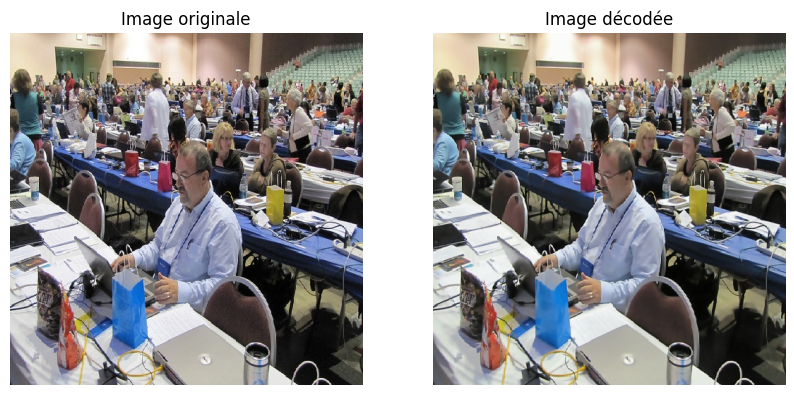

Prediction Caption: beautiful skateboard lush big lake bird skateboard lush step lake black skateboard sign bird skateboard red silver wall silver desk man


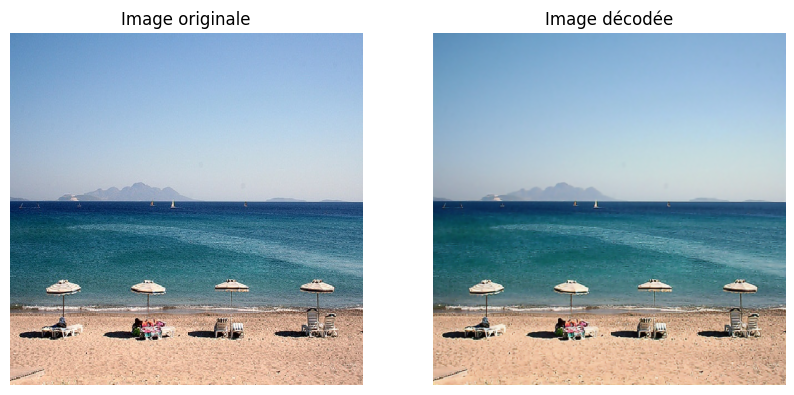

Prediction Caption: wall train about wall lake print man vehicle wall step fish cell snowboard towel skateboard park pink tennis towel oven step


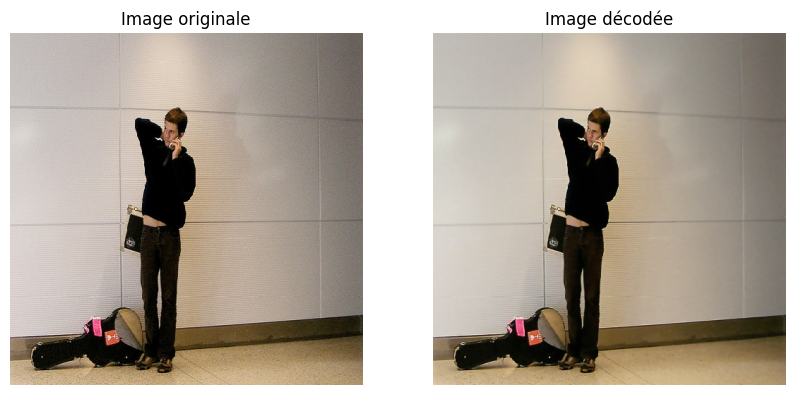

Prediction Caption: silver snowy border wall wall all sliding ball lush skateboard pink silver mirror skateboard big computer all vehicle sink in red


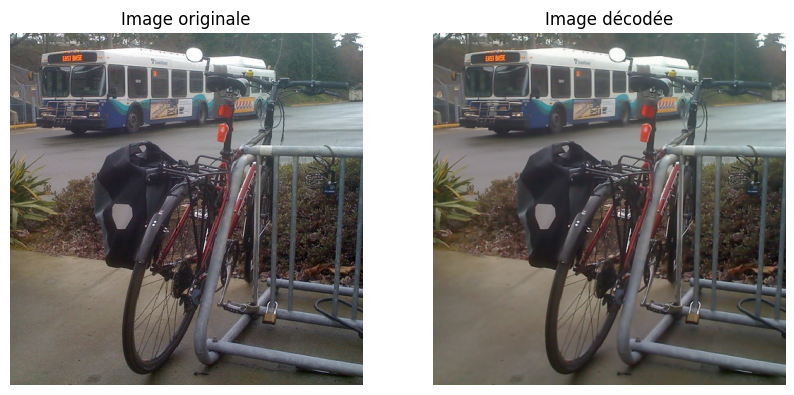

Prediction Caption: bench on scooter bench vehicle living water goes keyboard kite building board food skateboard bird skateboard sighting union style ottoman train


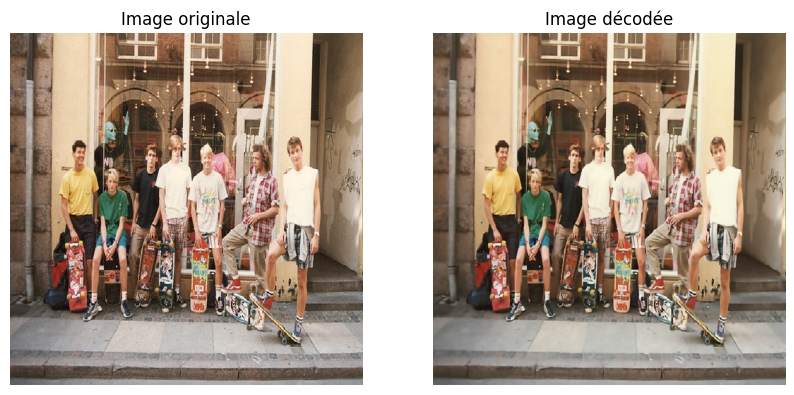

In [34]:
##################### Assembling Everything #####################

# Répertoire contenant les images à tester
directory_path = '../usr/src/project/_Dataset/NoisyImages/Dataset'

# Liste des fichiers dans le répertoire
image_files = os.listdir(directory_path)
# Add the path to the file name
image_files = [os.path.join(directory_path, file_name) for file_name in image_files]

#OU
# Générer la liste avec des images spécifiques (URL ou chemin local)
# image_files = ["../usr/src/project/_Dataset/photo_0013.jpg"]

#shuffle the list
np.random.shuffle(image_files)

# Limite le nombre d'images à afficher
num_images_to_display = 5

# Afficher uniquement les 5 premières images après la prédiction
for i, image_file in enumerate(image_files[:num_images_to_display]):
    
    img = get_image_from_path_or_url(image_file)

    is_photo = isPhoto(img)

    if not is_photo:
        print(image_file + " is not a photo")
        # continue

    denoise_img = denoise(img)

    caption = captionning(denoise_img)
    print('Prediction Caption:', (' '.join(caption)))

    # Afficher l'image originale et l'image décodée
    plt.figure(figsize=(10, 10)) 
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Image originale')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(denoise_img)
    plt.title('Image décodée')
    plt.axis("off")

    plt.show()

# **3. Création d'une interface graphique** <a class="anchor" id="interface"></a>

Afin de rendre notre solution finale plus accessible, la conception d'une interface graphique permettant de charger une ou plusieurs images et d'afficher les légendes automatiques de ces images a été réalisé.

Nous avons choisi d'utiliser la librairie Tkinter pour développer cette interface, car elle est idéale pour la création d'interfaces en Python. Nous avons également intégré customtkinter qui permet de créer des widgets personnalisés et plus esthétiques.

Pour tester notre interface graphique, lancez le fichier `image_captionning_app.exe` présent dans le dossier.

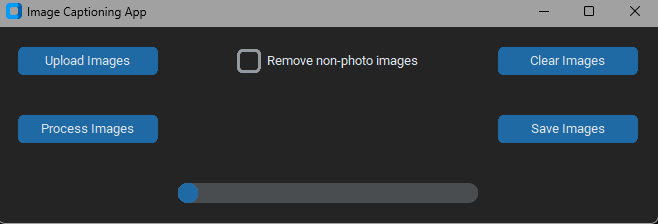

- Pour commencer, une ou plusieurs images à partir de votre disque via le bouton `Upload Images`. Vous pouvez filtrer les images pour savoir si elles sont des photos ou non en activant la case `Remove non-photos images`. Vous pouvez répéter cette étape autant de fois que vous le souhaitez pour ajouter des images au fur et à mesure.
- Une fois que vos images sélectionnées, cliquez sur le bouton `Process Images` pour lancer le traitement des images. Une fois que le traitement est terminé, les légendes automatiques des images sont affichées en dessous de chaque image.
- Si vous désirez sauvegarder les résultats, cliquez sur le bouton `Save Images` et sélectionnez le dossier dans lequel vous souhaitez sauvegarder les résultats. Les résultats seront sauvegardés en images avec la légende automatique en guise de nom.
- Vous pouvez relancer le processus autant de fois que vous le souhaitez en cliquant sur le bouton `Clear Images`.

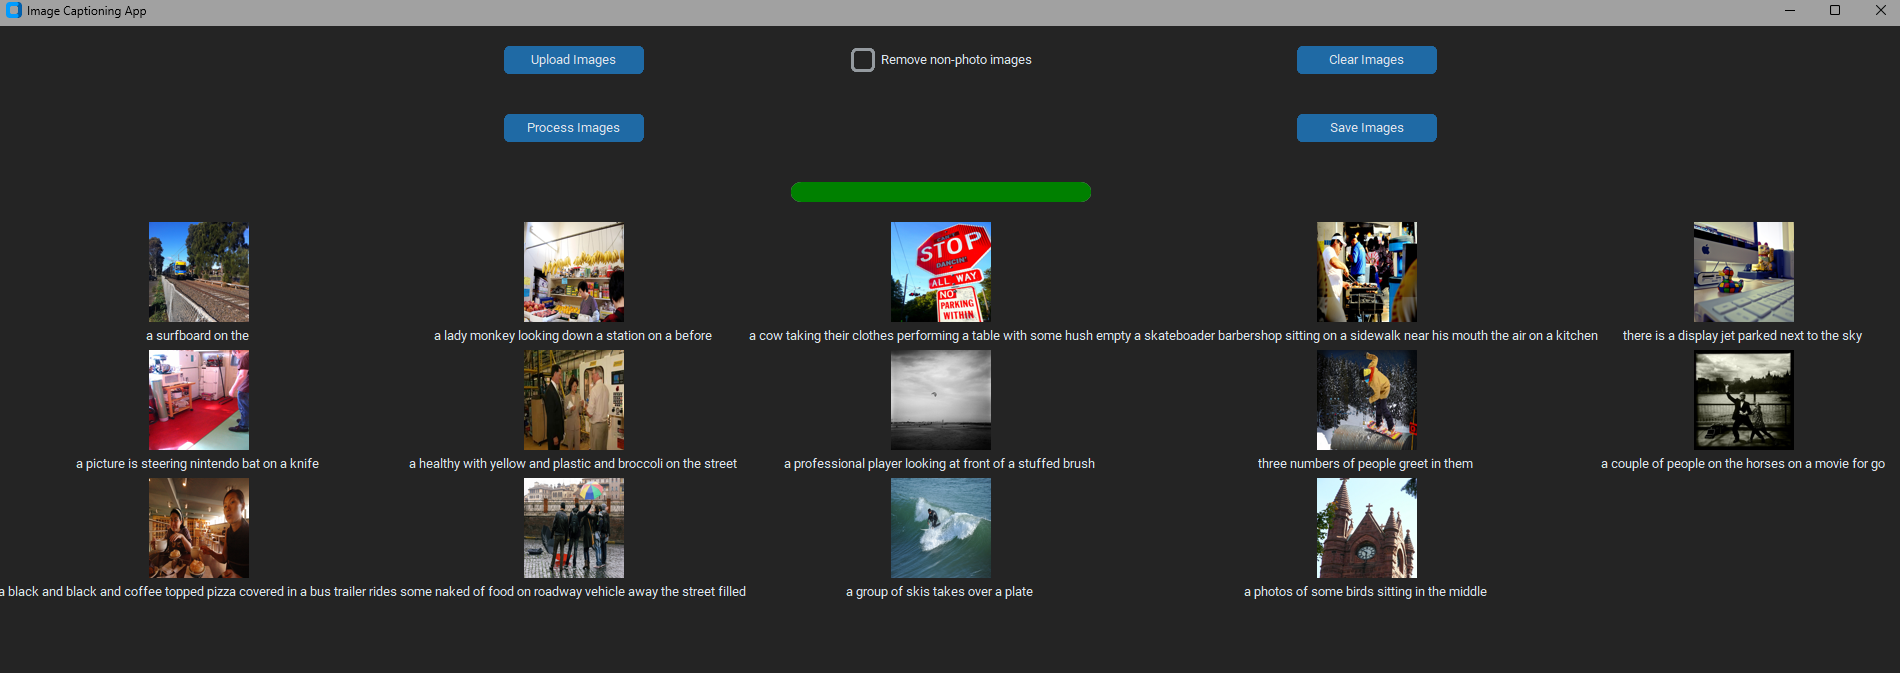

# **4. Conclusion** <a class="anchor" id="conclusion"></a>

Tout au long de ce projet, nous avons conçu une solution complète et automatisée répondant aux besoins actuels de l'entreprise TouNum. Notre système, basé sur le principe du captioning, va trier les images, mais aussi générer des légendes descriptives pour chacune d'elles de manière automatique. De plus, nous avons décidé d'ajouter une interface graphique pour rendre notre solution plus accessible. Cette dernière offre aux utilisateurs la possibilité de charger facilement des images et d'en visualiser instantanément les légendes automatiques.